end1.ipynb

In [1]:
from sklearn.metrics import confusion_matrix, accuracy_score # type: ignore
from sklearn.metrics import classification_report # type: ignore
from sklearn.model_selection import train_test_split # type: ignore
from sklearn.feature_extraction.text import CountVectorizer # type: ignore

In [1]:
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore
import pandas as pd # type: ignore
import numpy as np # type: ignore
import re

In [2]:
df = pd.read_csv("flipkart_product.csv",encoding="latin-1")

In [4]:
df.head()

,ProductName,Price,Rate,Review,Summary
0,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",5,Super!,Great cooler.. excellent air flow and for this...
1,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",5,Awesome,Best budget 2 fit cooler. Nice cooling
2,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",3,Fair,The quality is good but the power of air is de...
3,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",1,Useless product,Very bad product it's a only a fan
4,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",3,Fair,Ok ok product


In [5]:
def remove_punc(str):
    return re.sub(r"[^\w\s]","",str)

In [6]:
from nltk.corpus import stopwords # type: ignore
def remove_stopwords(input_str):
    # Get the set of English stopwords
    stop_words = set(stopwords.words("english"))
    
    # Convert input string to lowercase and split into words
    words = input_str.lower().split()
    
    # Filter out stopwords
    filtered_words = [w for w in words if w not in stop_words]
    
    # Join the filtered words into a single string
    return " ".join(filtered_words)

In [8]:
def clean_text(text):
    # Remove non-ASCII characters
    text = ''.join([i if ord(i) < 128 else ' ' for i in text])
    
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    
    # Convert to lowercase and split text into words
    words = text.lower().split()
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in words if word not in stop_words]
    
    # Join the cleaned words back into a single string
    return ' '.join(filtered_words)

In [9]:
df["ProductName"] = df["ProductName"].astype(str)

In [10]:
df["ProductName"] = df["ProductName"].map(remove_punc)

In [11]:
df["ProductName"] = df["ProductName"].map(remove_stopwords)   #1m 46.5s

In [12]:
df["ProductName"] = df["ProductName"].map(clean_text)

In [13]:
df.head()

,ProductName,Price,Rate,Review,Summary
0,candes 12 l roompersonal air cooler white blac...,"??3,999",5,Super!,Great cooler.. excellent air flow and for this...
1,candes 12 l roompersonal air cooler white blac...,"??3,999",5,Awesome,Best budget 2 fit cooler. Nice cooling
2,candes 12 l roompersonal air cooler white blac...,"??3,999",3,Fair,The quality is good but the power of air is de...
3,candes 12 l roompersonal air cooler white blac...,"??3,999",1,Useless product,Very bad product it's a only a fan
4,candes 12 l roompersonal air cooler white blac...,"??3,999",3,Fair,Ok ok product


In [14]:
df["ProductName"].unique()[:7]

array(['candes 12 l roompersonal air cooler white black elegant high speedhoney comb cooling pad ice chamber blower',
       'candes 60 l roompersonal air cooler white black creta',
       'maharaja whiteline 65 l desert air cooler white grey rambo grey ac303',
       'crompton 75 l desert air cooler white teal acgcdac751',
       'colcum collapsible wardrobe 88130 micro fiber collapsible wardrobe finish color maroon diydoityourself',
       'flipzon baby 6 shelve unbreakable material pvc collapsible wardrobe finish color blue diydoityourself',
       'k store carbon steel collapsible wardrobe finish color black diydoityourself'],
      dtype=object)

In [15]:
df["Review"] = df["Review"].astype(str)

In [16]:
df["Review"] = df["Review"].map(remove_punc)

In [17]:
df["Review"] = df["Review"].map(remove_stopwords)   #1m 43.8s

In [18]:
df["Review"] = df["Review"].map(clean_text)  #1m 44.4s

In [19]:
df["Summary"] = df["Summary"].astype(str).map(remove_punc)
df["Summary"] = df["Summary"].map(remove_stopwords)   #1m 25.8s

In [20]:
def clean_price(price):
    if pd.isna(price):  # Handle NaN values
        return np.nan
    # Extract numbers from the price
    price = re.sub(r'[^\d]', '', price)
    return int(price) if price else np.nan

In [21]:
df.isnull().sum()

ProductName    0
Price          1
Rate           1
Review         0
Summary        0
dtype: int64

In [22]:
df[df["Price"].isnull()==True]

,ProductName,Price,Rate,Review,Summary
189873,,NaN,NaN,nan,nan


In [23]:
df[df['Rate'].isnull()==True]

,ProductName,Price,Rate,Review,Summary
189873,,NaN,NaN,nan,nan


In [24]:
df["Price"] = df["Price"].apply(clean_price)
df.loc[189873,"Price"] = 142
df.loc[189873,"Rate"]  = 4

In [25]:
df.isnull().sum().any()

False

In [26]:
df["Rate"].unique()

array(['5', '3', '1', '4', '2',
       'Pigeon Favourite Electric Kettle?ÿ?ÿ(1.5 L, Silver, Black)',
       'Bajaj DX 2 L/W Dry Iron',
       'Nova Plus Amaze NI 10 1100 W Dry Iron?ÿ?ÿ(Grey & Turquoise)', 's',
       4], dtype=object)

In [27]:
df["Rate"] = df["Rate"].astype(str)
df["Rate"] = df["Rate"].map(clean_text)

In [28]:
df["Rate"] = df["Rate"].map(remove_punc)

In [29]:
df["Rate"] = df["Rate"].map(remove_stopwords)  #1m 43.0s

In [31]:
df["Rate"].unique()

array(['5', '3', '1', '4', '2',
       'pigeon favourite electric kettle 15 l silver black',
       'bajaj dx 2 lw dry iron',
       'nova plus amaze ni 10 1100 w dry iron grey turquoise', ''],
      dtype=object)

In [ ]:
df["ProductName"] = df["ProductName"].astype(str)
df["ProductName"] = df["ProductName"].map(clean_text)  #1m 47.7s

In [33]:
df["Price"].nunique(), df["Price"].dtype

(476, dtype('float64'))

In [34]:
df.head()

,ProductName,Price,Rate,Review,Summary
0,candes 12 l roompersonal air cooler white blac...,3999.0,5,super,great cooler excellent air flow price amazing ...
1,candes 12 l roompersonal air cooler white blac...,3999.0,5,awesome,best budget 2 fit cooler nice cooling
2,candes 12 l roompersonal air cooler white blac...,3999.0,3,fair,quality good power air decent
3,candes 12 l roompersonal air cooler white blac...,3999.0,1,useless product,bad product fan
4,candes 12 l roompersonal air cooler white blac...,3999.0,3,fair,ok ok product


In [35]:
df_Summary = df.drop(["ProductName","Price","Rate","Review"],axis=1)
print("Dataframe summary:\n")
print(df_Summary)

Dataframe summary:

                                                  Summary
0       great cooler excellent air flow price amazing ...
1                   best budget 2 fit cooler nice cooling
2                           quality good power air decent
3                                         bad product fan
4                                           ok ok product
...                                                   ...
189869                                             thanks
189870                                               good
189871                                              super
189872                                               good
189873                                                nan

[189874 rows x 1 columns]


In [36]:
from nltk.tokenize import word_tokenize # type: ignore
stop_words = set(stopwords.words("english"))
def data_preprocessing(text):
    text = text.lower()
    text = re.sub(r"https:\S+|www\S+https\S+", '',text,flags=re.MULTILINE)
    text = re.sub(r"\@\w+|\#", '',text)
    text = re.sub(r'[^\w\s]', '',text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return  " ".join(filtered_text) 

df["Proc_summary"] = df_Summary["Summary"].map(data_preprocessing)
df["Proc_summary"]

0         great cooler excellent air flow price amazing ...
1                     best budget 2 fit cooler nice cooling
2                             quality good power air decent
3                                           bad product fan
4                                             ok ok product
                                ...                        
189869                                               thanks
189870                                                 good
189871                                                super
189872                                                 good
189873                                                  nan
Name: Proc_summary, Length: 189874, dtype: object

In [37]:
from textblob import TextBlob # type: ignore
def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return "positive"
    elif polarity < 0:
        return "negative"
    else:
        return "neutral"

In [38]:
df.head()

,ProductName,Price,Rate,Review,Summary,Proc_summary
0,candes 12 l roompersonal air cooler white blac...,3999.0,5,super,great cooler excellent air flow price amazing ...,great cooler excellent air flow price amazing ...
1,candes 12 l roompersonal air cooler white blac...,3999.0,5,awesome,best budget 2 fit cooler nice cooling,best budget 2 fit cooler nice cooling
2,candes 12 l roompersonal air cooler white blac...,3999.0,3,fair,quality good power air decent,quality good power air decent
3,candes 12 l roompersonal air cooler white blac...,3999.0,1,useless product,bad product fan,bad product fan
4,candes 12 l roompersonal air cooler white blac...,3999.0,3,fair,ok ok product,ok ok product


In [39]:
df["Y"] = df["Review"] + " " + df["Proc_summary"]

In [40]:
df.head()

,ProductName,Price,Rate,Review,Summary,Proc_summary,Y
0,candes 12 l roompersonal air cooler white blac...,3999.0,5,super,great cooler excellent air flow price amazing ...,great cooler excellent air flow price amazing ...,super great cooler excellent air flow price am...
1,candes 12 l roompersonal air cooler white blac...,3999.0,5,awesome,best budget 2 fit cooler nice cooling,best budget 2 fit cooler nice cooling,awesome best budget 2 fit cooler nice cooling
2,candes 12 l roompersonal air cooler white blac...,3999.0,3,fair,quality good power air decent,quality good power air decent,fair quality good power air decent
3,candes 12 l roompersonal air cooler white blac...,3999.0,1,useless product,bad product fan,bad product fan,useless product bad product fan
4,candes 12 l roompersonal air cooler white blac...,3999.0,3,fair,ok ok product,ok ok product,fair ok ok product


In [41]:
df["Sentiment"] = df["Proc_summary"].map(get_sentiment)
df.head()

,ProductName,Price,Rate,Review,Summary,Proc_summary,Y,Sentiment
0,candes 12 l roompersonal air cooler white blac...,3999.0,5,super,great cooler excellent air flow price amazing ...,great cooler excellent air flow price amazing ...,super great cooler excellent air flow price am...,positive
1,candes 12 l roompersonal air cooler white blac...,3999.0,5,awesome,best budget 2 fit cooler nice cooling,best budget 2 fit cooler nice cooling,awesome best budget 2 fit cooler nice cooling,positive
2,candes 12 l roompersonal air cooler white blac...,3999.0,3,fair,quality good power air decent,quality good power air decent,fair quality good power air decent,positive
3,candes 12 l roompersonal air cooler white blac...,3999.0,1,useless product,bad product fan,bad product fan,useless product bad product fan,negative
4,candes 12 l roompersonal air cooler white blac...,3999.0,3,fair,ok ok product,ok ok product,fair ok ok product,positive


In [42]:
df["Sentiment_val"] = df["Sentiment"].map({"positive":1,"negative":-1,"neutral":0})

<Axes: xlabel='Sentiment_val'>

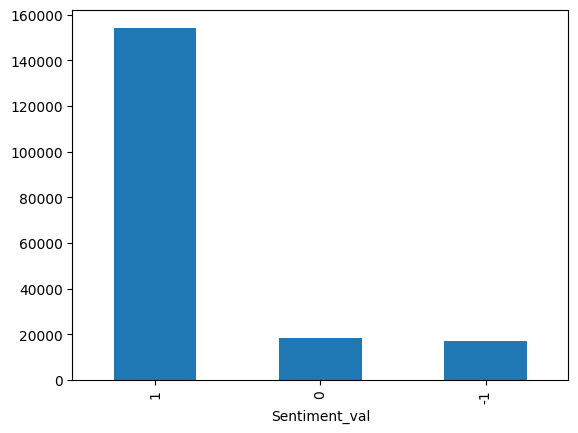

In [43]:
df['Sentiment_val'].value_counts().plot(kind='bar')

In [44]:
df.head()

,ProductName,Price,Rate,Review,Summary,Proc_summary,Y,Sentiment,Sentiment_val
0,candes 12 l roompersonal air cooler white blac...,3999.0,5,super,great cooler excellent air flow price amazing ...,great cooler excellent air flow price amazing ...,super great cooler excellent air flow price am...,positive,1
1,candes 12 l roompersonal air cooler white blac...,3999.0,5,awesome,best budget 2 fit cooler nice cooling,best budget 2 fit cooler nice cooling,awesome best budget 2 fit cooler nice cooling,positive,1
2,candes 12 l roompersonal air cooler white blac...,3999.0,3,fair,quality good power air decent,quality good power air decent,fair quality good power air decent,positive,1
3,candes 12 l roompersonal air cooler white blac...,3999.0,1,useless product,bad product fan,bad product fan,useless product bad product fan,negative,-1
4,candes 12 l roompersonal air cooler white blac...,3999.0,3,fair,ok ok product,ok ok product,fair ok ok product,positive,1


In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np # type: ignore
import pandas as pd # type: ignore
from bs4 import BeautifulSoup # type: ignore
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore

import nltk # type: ignore
from nltk.corpus import stopwords # type: ignore
from nltk.stem import SnowballStemmer # type: ignore
from nltk.tokenize import TweetTokenizer # type: ignore

from sklearn.ensemble import * # type: ignore
from sklearn.tree import * # type: ignore
from sklearn.naive_bayes import * # type: ignore
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer, HashingVectorizer # type: ignore
from sklearn.linear_model import LogisticRegression # type: ignore
from sklearn.svm import SVC # type: ignore
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score # type: ignore
from sklearn.pipeline import make_pipeline, Pipeline # type: ignore
from sklearn.model_selection import GridSearchCV, train_test_split # type: ignore
from sklearn.metrics import make_scorer, accuracy_score, f1_score # type: ignore
from sklearn.metrics import roc_curve, auc # type: ignore
from sklearn.metrics import confusion_matrix, roc_auc_score, recall_score, precision_score # type: ignore
from sklearn.neighbors import * # type: ignore

last21.ipynb

In [46]:
vectorizer = TfidfVectorizer(max_features=5000)  # Limit features for performance
X = vectorizer.fit_transform(df['Y'])

In [47]:
type(X), X.shape

(scipy.sparse._csr.csr_matrix, (189874, 5000))

In [48]:
y = df['Sentiment_val']
np.array(y)

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [51]:
lr_pred = lr_model.predict(X_test)
lr_acc  = accuracy_score(lr_pred, y_test)
lr_acc

0.9623699802501646

In [52]:
dct = DecisionTreeClassifier(max_depth=400,random_state=42)
dct.fit(X_train,y_train)  #47s

DecisionTreeClassifier(max_depth=400, random_state=42)

In [53]:
dct_pred = dct.predict(X_test)
dct_acc  = accuracy_score(dct_pred, y_test)
dct_acc

0.9567083607636603

In [54]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)
knn_acc = accuracy_score(knn_pred, y_test)
knn_acc

0.9054377880184332

In [55]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)   #5m 3.2s

RandomForestClassifier()

In [56]:
rfc_pred = rfc.predict(X_test)
rfc_acc  = accuracy_score(rfc_pred, y_test)
rfc_acc

0.9604476629361421

In [57]:
ans = np.array([])
ans = np.append(ans,{"DCT":dct_acc})
ans = np.append(ans,{"LGR":lr_acc})
ans = np.append(ans,{"RFC":rfc_acc})
ans

array([{'DCT': 0.9567083607636603}, {'LGR': 0.9623699802501646},
       {'RFC': 0.9604476629361421}], dtype=object)

In [58]:
e = [('lgr',lr_model),('dct',dct),('knn',knn)]
stack = StackingClassifier(estimators=e, final_estimator=rfc)

In [ ]:
stack.fit(X_train, y_train)  #16m 48.7s

StackingClassifier(estimators=[('lgr', LogisticRegression(max_iter=1000)),
                               ('dct',
                                DecisionTreeClassifier(max_depth=400,
                                                       random_state=42)),
                               ('knn', KNeighborsClassifier(n_neighbors=15))],
                   final_estimator=RandomForestClassifier())

In [60]:
stack_pred = stack.predict(X_test)  #4m 6.2s

In [61]:
stack_acc = accuracy_score(stack_pred, y_test)
stack_acc

0.9705332455562871

In [62]:
df = pd.DataFrame({
    "Model": ["LGR","DCT","RFC","KNN","STACK"],
    "Accuracy":[lr_acc,dct_acc, rfc_acc, knn_acc, stack_acc]
})
df.to_csv("a0000.csv",index=False)
df

,Model,Accuracy
0,LGR,0.962370
1,DCT,0.956708
2,RFC,0.960448
3,KNN,0.905438
4,STACK,0.970533


In [67]:
f1_score(stack_pred, y_test, average="macro")

0.9338099493728027

In [69]:
recall_score(y_test,stack_pred,average="macro")

0.9254701222316721

In [70]:
precision_score(y_test,stack_pred,average="macro")

0.9425085593499515

In [71]:
confusion_matrix(y_test, stack_pred)

array([[ 3086,    97,   247],
       [   69,  3254,   339],
       [  129,   238, 30516]], dtype=int64)

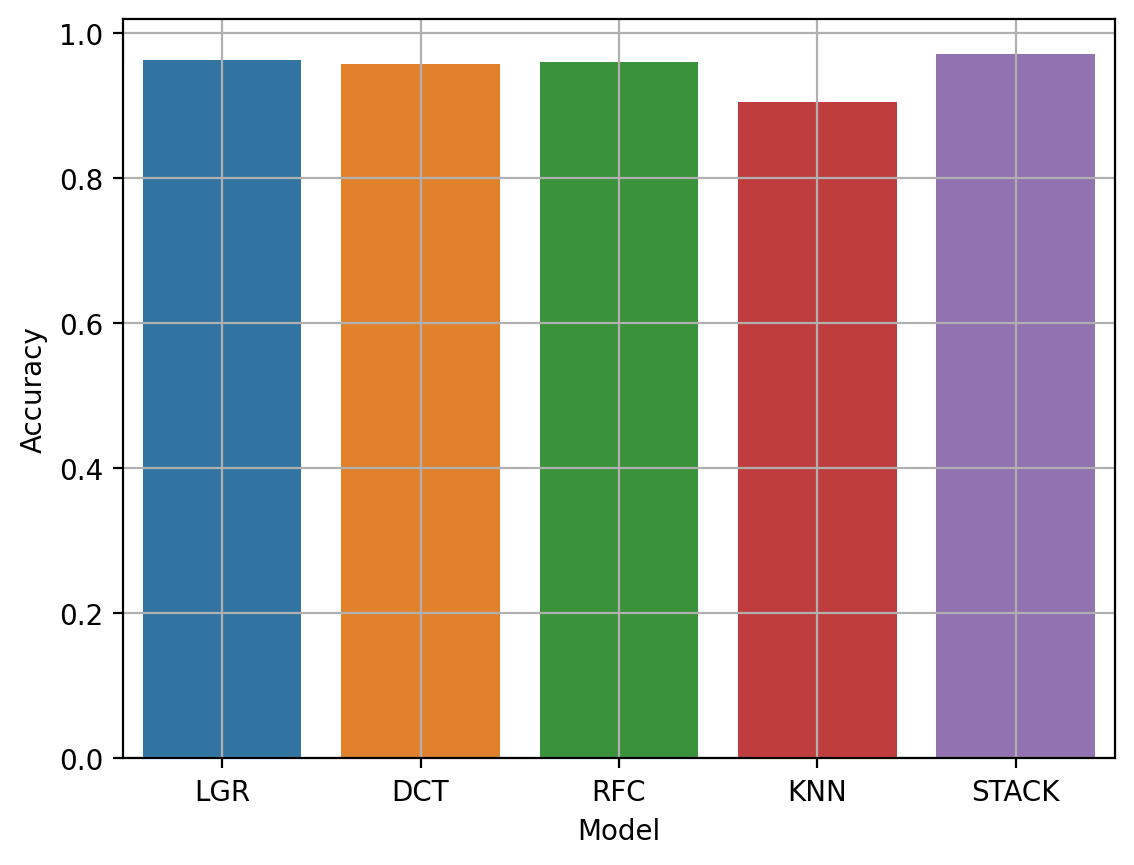

In [63]:
sns.barplot(x='Model',y='Accuracy',data=df,hue='Model')
plt.grid()
plt.show()

In [ ]:
from sklearn.metrics import * # type: ignore

In [71]:
confusion_matrix(stack_pred, y_test)

array([[ 3093,    64,   129],
       [   94,  3254,   231],
       [  243,   344, 30523]], dtype=int64)

In [72]:
print("LogisticRegression")

LogisticRegression


In [73]:
confusion_matrix(lr_pred, y_test)

array([[ 3000,   114,   153],
       [  150,  3031,   215],
       [  280,   517, 30515]], dtype=int64)

In [75]:
r2_score(lr_pred, y_test)

0.8032800022027456

In [76]:
r2_score(stack_pred, y_test)

0.8414654240747639

In [78]:
print(classification_report(stack_pred, y_test))

              precision    recall  f1-score   support

          -1       0.90      0.94      0.92      3286
           0       0.89      0.91      0.90      3579
           1       0.99      0.98      0.98     31110

    accuracy                           0.97     37975
   macro avg       0.93      0.94      0.93     37975
weighted avg       0.97      0.97      0.97     37975



In [79]:
r2_score(dct_pred, y_test)

0.767564112672277

In [80]:
f1_score(dct_pred, y_test)

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].